# Universidad de Buenos Aires
# Aprendizaje Profundo - TP1
# Cohorte 18 - 1er bimestre 2025


Este primer TP comienza desde el día después de la clase 2 (12 de marzo) y la ventana de entrega estará abierta hasta las **23hs del lunes 7 de abril (hora de Argentina)**. La resolución del TP es **individual**. Pueden utilizar los contenidos vistos en clase y otra bibliografía. Si se toman ideas de fuentes externas deben ser correctamente citadas incluyendo el correspondiente link o página de libro.

El formato de entrega debe ser un link a un notebook de google colab (permitir acceso a gerardo.vilcamiza@ieee.org y gvilcamiza.ext@fi.uba.ar) y **se realizará en el siguiente link de google forms: [link](https://forms.gle/ViVSD2CG8TcrZ9wBA)**. Tanto los resultados, como el código y las explicaciones deben quedar guardados y visualizables en el colab.

NO ES NECESARIO QUE NOS ENVIEN COREEO AVISANDO DE LA ENTREGA.

**Consideraciones a tener en cuenta:**
- Se entregará 1 solo colab para este TP1.
- Renombrar el archivo de la siguiente manera: **APELLIDO-NOMBRE-DL-TP1-Co18.ipynb**
- Los códigos deben poder ejecutarse.
- Los resultados, cómo el código, los gráficos y las explicaciones deben quedar guardados y visualizables en el correspondiente notebook.
- Prestar atención a las consignas, responder las preguntas cuando corresponda.

# **PREGUNTA 1**

## **Comparación de Gradiente Descendente y Adam en una Función de Costo No Convexa**

En este ejercicio se compararán los optimizadores Gradiente Descendente (GD) y Adam en la minimización de una función de costo basada en una red neuronal de una sola neurona:
$$
z = w x + b
$$
Con activación tangente hiperbólica:

$$
\hat{y} = \tanh(z) = \tanh(w x + b)
$$

\\

Se analizará la trayectoria de aprendizaje de ambos algoritmos y se evaluará su eficiencia con diferentes tasas de aprendizaje (learning rate).

\\

La función de costo utilizada es el Error Cuadrático Medio (MSE):

$$
J(w, b) = \frac{1}{m} \sum_{i=1}^{m} (\hat{y}_i - y_i)^2
$$

$$
J(w, b) = \frac{1}{m} \sum_{i=1}^{m} ( \tanh(w x_i + b) - y_i )^2
$$

donde \\( w \\) y \\( b \\) son los parámetros a optimizar.

\\

Si bien es cierto, en estos experimentos estamos comparando optimizadores (GD vs Adam), y no entrenando un modelo como tal, de igual forma se necesitará una especie de dataset. Este será sintético y solo de prueba, por ende tendrán cierta libertad para elegir sus valores. Sin embargo deberán tomar en cuenta que cumpla la siguiente estructura:

`x = np.linspace(ini, fin, n)`

donde `x` es un array de una sola dimensión y con `n` cantidad de valores. Y tiene un rango de valores desde `ini` hasta `fin`. Recomiendo que sean los mismo valores solo que con el signo cambiado, por ejemplo `ini=-3 , fin=3`.

\\

Y con un target `y`:

`y = funcion_no_lineal(x) + ruido`

donde `y` es también un vector de una sola dimensión de tamaño `n` que sigue un patrón no lineal con respecto a `x` adicionando un ruido que puede ser creado con algunas de las funciones del paquete `np.random`.


### 1a) Implementación del Gradiente Descendente (1 punto)
- Implementar el algoritmo del Gradiente Descendente (GD) para minimizar \\( J(w, b) \\).
- Utilizar 100 épocas y 3 diferentes learning rates `(0.1, 0.01, 0.001)`.
- Inicializar valores de \\( w \\) y \\( b \\) de manera aleatoria con `np.random.randn()` para cada learning rate.
- Graficar la función de Costo \\( J(w, b) \\) VS número de época

\\

El optimizador del Gradiente Descendente se debe implementar haciendo el código desde cero y paso a paso. Se pueden usar librerías como `numpy`, `scipy`, `matplotlib` o similares. Pero no está permitido usar Pytorch ni TensorFlow o frameworks que ya contengan el optimizador desarrollado.

### 1b) Implementación de Adam (1.5 puntos)  
- Implementar el algoritmo de Adam para minimizar \\( J(w, b) \\).  
- Utilizar 100 épocas y 3 diferentes learning rates `(0.1, 0.01, 0.001)`.
- Utilizar los mismos valores de \\( w \\) y \\( b \\) que se usaron para GD para cada diferente learning rate.
- Graficar la función de Costo \\( J(w, b) \\) VS número de época
- Comparar el resultado y rendimiento de Adam VS GD para cada learning rate.

\\

Al igual que para GD, el optimizador Adam también se debe implementar desde cero y paso a paso. Se pueden usar librerías como `numpy`, `scipy`, `matplotlib` o similares. Pero no está permitido usar Pytorch ni TensorFlow o frameworks que ya contengan el optimizador desarrollado.

### 1c) Visualización en 3D de la trayectoria de aprendizaje (0.5 puntos)
- Graficar en 3D la trayectoria del aprendizaje de ambos optimizadores sobre la superficie de la función de costo \\( J(w, b) \\). Se debe elegir un solo learning rate.
- Comparar cómo se mueven en el espacio de parámetros y qué diferencias existen en la convergencia.
- Recomiendo utilizar `mpl_toolkits.mplot3d` y `np.meshgrid`, pero queda a su criterio la elección de funciones a usar para lograr el gráfico.

# **Resolucion**

## 1a

In [172]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [173]:
#seteo de la semilla para reproducibilidad
np.random.seed(42)

# Parámetros del dataset
ini, fin, n = -3, 3, 100
x = np.linspace(ini, fin, n)

In [174]:
print(f"x: {x}")

x: [-3.         -2.93939394 -2.87878788 -2.81818182 -2.75757576 -2.6969697
 -2.63636364 -2.57575758 -2.51515152 -2.45454545 -2.39393939 -2.33333333
 -2.27272727 -2.21212121 -2.15151515 -2.09090909 -2.03030303 -1.96969697
 -1.90909091 -1.84848485 -1.78787879 -1.72727273 -1.66666667 -1.60606061
 -1.54545455 -1.48484848 -1.42424242 -1.36363636 -1.3030303  -1.24242424
 -1.18181818 -1.12121212 -1.06060606 -1.         -0.93939394 -0.87878788
 -0.81818182 -0.75757576 -0.6969697  -0.63636364 -0.57575758 -0.51515152
 -0.45454545 -0.39393939 -0.33333333 -0.27272727 -0.21212121 -0.15151515
 -0.09090909 -0.03030303  0.03030303  0.09090909  0.15151515  0.21212121
  0.27272727  0.33333333  0.39393939  0.45454545  0.51515152  0.57575758
  0.63636364  0.6969697   0.75757576  0.81818182  0.87878788  0.93939394
  1.          1.06060606  1.12121212  1.18181818  1.24242424  1.3030303
  1.36363636  1.42424242  1.48484848  1.54545455  1.60606061  1.66666667
  1.72727273  1.78787879  1.84848485  1.90909091  

In [175]:
# Función objetivo no lineal con lambda y agregamos ruido
target_function = lambda x: np.sin(x)
noise = np.random.normal(0, 0.1, size=n)
y = target_function(x) + noise

In [176]:
print(f"x: {y}")

x: [-0.09144859 -0.21465017 -0.19502119 -0.16549942 -0.39806315 -0.45353122
 -0.32608658 -0.45937745 -0.63321281 -0.58000107 -0.72626157 -0.76965886
 -0.73940059 -0.99263186 -1.00856028 -0.9239919  -0.9975545  -0.89006381
 -1.03412444 -1.10292203 -0.82996511 -1.01036016 -0.98865514 -1.1418531
 -1.05411719 -0.9852165  -1.10437954 -0.9410492  -1.02442823 -0.97573798
 -0.98546774 -0.71540006 -0.87400133 -0.94724208 -0.72494601 -0.89205037
 -0.70901786 -0.88312926 -0.77471563 -0.57458866 -0.47062373 -0.47552988
 -0.4506188  -0.41393941 -0.4750469  -0.34134333 -0.25659792 -0.04522388
 -0.05642209 -0.20660241  0.06270679  0.0522757   0.0832439   0.27170167
  0.37245886  0.42032271  0.29990728  0.40813273  0.52579305  0.6420249
  0.54635736  0.62333113  0.57652875  0.61028356  0.85121859  0.94282451
  0.83426997  0.9730049   0.93679148  0.8607851   0.98270816  1.11816802
  0.9750364   1.14574455  0.73433425  1.08186916  1.00808299  0.96550722
  0.9969586   0.7777731   0.93972447  0.97903329  

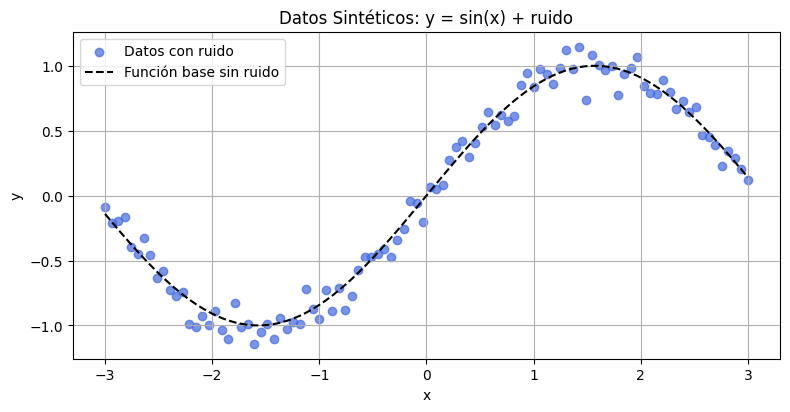

In [177]:
# Gráfico
plt.figure(figsize=(8, 4))
plt.scatter(x, y, color='royalblue', alpha=0.7, label='Datos con ruido')
plt.plot(x, np.sin(x), color='black', linestyle='--', label='Función base sin ruido')
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.title('Datos Sintéticos: y = sin(x) + ruido')
plt.show()

In [178]:
# Derivada de la función de activación
def tanh(z):
    return np.tanh(z)

In [179]:
# Derivada de la función de activación
def tanh_derivative(z):
    return 1 - np.tanh(z)**2

In [180]:
#funcion de costo mean squared error y su derivada
def mse(y_true, y_pred):
    return np.mean(np.power(y_true-y_pred, 2))

def mse_der(y_true, y_pred):
    return 2*(y_true-y_pred)/y_true.size

En esta sección implementaremos el algoritmo de Gradiente Descendente (Gradient Descent - GD) para minimizar una función de costo no convexa, basada en una red neuronal de una sola neurona con activación tangente hiperbólica.

El objetivo es encontrar los valores óptimos de los parámetros 
w (peso) y b (sesgo) que minimicen la función de costo. 

Esto se realizada usando los parametros: 

    - learning rates: tasa de aprendizaje
    - epochs: iteraciones

In [181]:
def gradient_descent_with_trajectory(x, y, learning_rate, epochs, w_init=None, b_init=None):
    m = len(y)
    w = w_init if w_init is not None else np.random.randn()
    b = b_init if b_init is not None else np.random.randn()
    cost_history = []
    trajectory = []

    for epoch in range(epochs):
        z = w * x + b
        y_pred = tanh(z)
        cost = mse(y, y_pred)
        cost_history.append(cost)
        trajectory.append((w, b))

        dz = (y_pred - y) * tanh_derivative(z)
        dw = (2/m) * np.dot(dz, x)
        db = (2/m) * np.sum(dz)

        w -= learning_rate * dw
        b -= learning_rate * db

    return w, b, cost_history, trajectory

    - Inicialización: se parte de valores aleatorios para simular un punto arbitrario del espacio de parámetros.
    - Forward pass: se calcula la predicción.
    - Costo: se calcula el error cuadrático medio.
    - Backward pass: derivamos la función de costo respecto de w y b, aplicando regla de la cadena.
    - Actualización: los parámetros se ajustan en dirección opuesta al gradiente.

In [182]:
learning_rates = [0.1, 0.01, 0.001]
epochs = 100
gd_results = []
trajectories = []
initial_params = [(np.random.randn(), np.random.randn()) for _ in learning_rates]

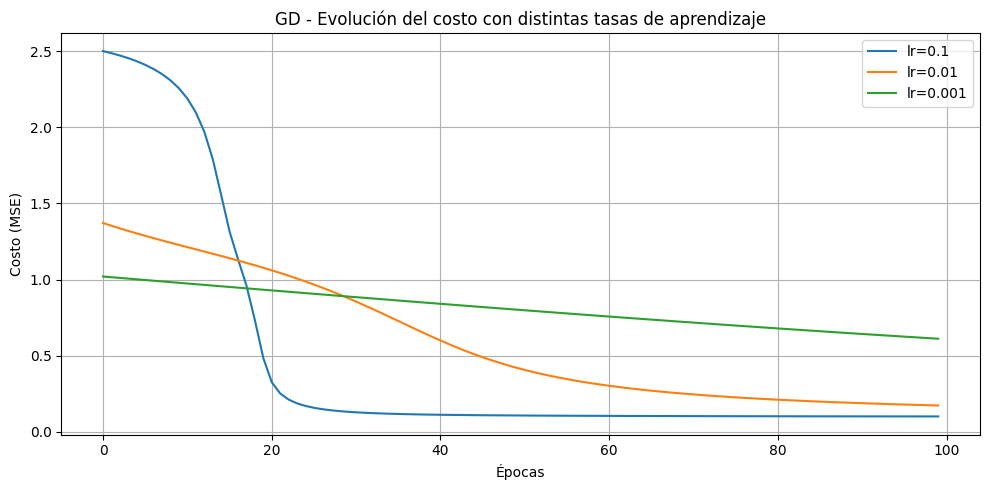

In [183]:
plt.figure(figsize=(10, 5))
for i, lr in enumerate(learning_rates):
    w0, b0 = initial_params[i]
    _, _, cost_history, trajectory = gradient_descent_with_trajectory(x, y, lr, epochs, w0, b0)
    
    gd_results.append(cost_history)
    trajectories.append(trajectory)
    
    plt.plot(cost_history, label=f"lr={lr}")

plt.title("GD - Evolución del costo con distintas tasas de aprendizaje")
plt.xlabel("Épocas")
plt.ylabel("Costo (MSE)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Este gráfico muestra claramente el trade-off entre velocidad y estabilidad.
Un learning rate muy alto puede ser eficiente si no causa divergencia, pero puede necesitar más cuidado con la inicialización.
Uno muy bajo puede ser seguro, pero ineficiente computacionalmente.
El valor óptimo suele estar en un punto medio, como 0.01 en este caso, o puede requerir técnicas adaptativas (como veremos con Adam en el punto 1b).

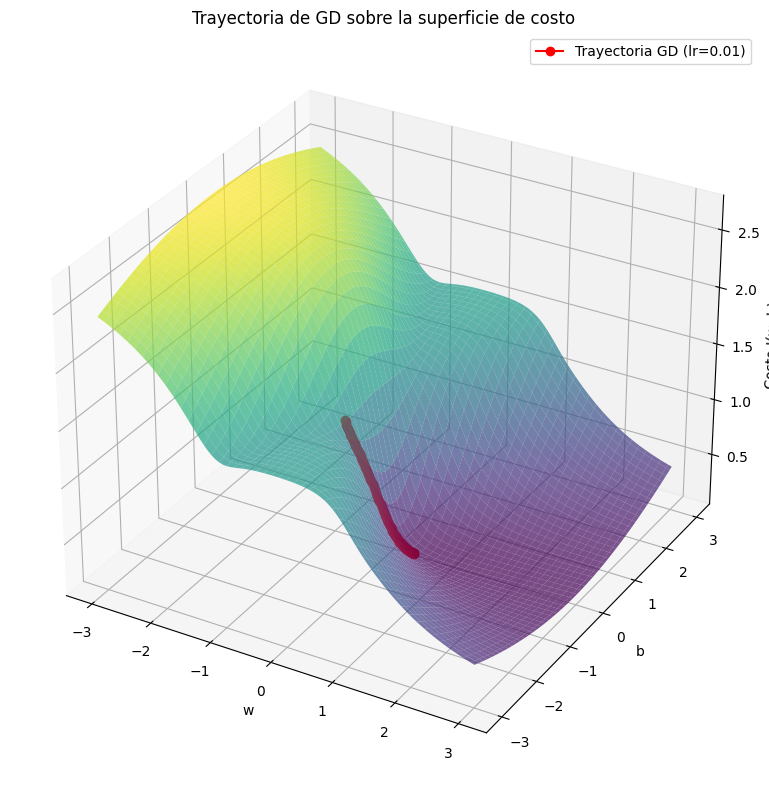

In [184]:
from mpl_toolkits.mplot3d import Axes3D

# Seleccionar la trayectoria (por ejemplo, lr = 0.01)
idx = 1  # learning_rates[1] = 0.01
trajectory = trajectories[idx]
lr = learning_rates[idx]

# Generar una malla de valores de w y b
w_vals = np.linspace(-3, 3, 100)
b_vals = np.linspace(-3, 3, 100)
W, B = np.meshgrid(w_vals, b_vals)
J = np.zeros_like(W)

# Calcular el costo J(w, b) para cada punto de la malla
for i in range(W.shape[0]):
    for j in range(W.shape[1]):
        y_pred = np.tanh(W[i, j] * x + B[i, j])
        J[i, j] = mse(y, y_pred)

# Separar la trayectoria en listas de w, b y costo
w_traj = [w for w, b in trajectory]
b_traj = [b for w, b in trajectory]
j_traj = [mse(y, tanh(w * x + b)) for w, b in trajectory]

# Gráfico
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Superficie del costo
ax.plot_surface(W, B, J, cmap='viridis', alpha=0.7, edgecolor='none')

# Trayectoria del GD
ax.plot(w_traj, b_traj, j_traj, color='red', marker='o', label=f'Trayectoria GD (lr={lr})')

# Estética
ax.set_title("Trayectoria de GD sobre la superficie de costo")
ax.set_xlabel("w")
ax.set_ylabel("b")
ax.set_zlabel("Costo J(w, b)")
ax.legend()
plt.tight_layout()
plt.show()


## 1b

Adam combina dos ideas clave:

    - Momentum: suaviza el gradiente usando una media móvil de primer orden.
    - RMSProp: escala adaptativamente el paso usando una media móvil del cuadrado del gradiente.

Para esto se uso como lectura el siguiente libro:
https://www.deeplearningbook.org/contents/optimization.html

In [185]:
def adam_with_trajectory(x, y, w_init, b_init, learning_rate, epochs, beta1=0.9, beta2=0.999, epsilon=1e-8):
    m = len(y)
    w, b = w_init, b_init
    mw = mb = vw = vb = 0  # Momentos iniciales

    cost_history = []
    trajectory = []

    for t in range(1, epochs + 1):
        z = w * x + b
        y_pred = tanh(z)
        cost = mse(y, y_pred)
        cost_history.append(cost)
        trajectory.append((w, b))

        # Gradientes
        dz = (y_pred - y) * tanh_derivative(z)
        dw = (2/m) * np.dot(dz, x)
        db = (2/m) * np.sum(dz)

        # Momentos
        mw = beta1 * mw + (1 - beta1) * dw
        mb = beta1 * mb + (1 - beta1) * db
        vw = beta2 * vw + (1 - beta2) * (dw**2)
        vb = beta2 * vb + (1 - beta2) * (db**2)

        # Corrección por sesgo
        mw_hat = mw / (1 - beta1**t)
        mb_hat = mb / (1 - beta1**t)
        vw_hat = vw / (1 - beta2**t)
        vb_hat = vb / (1 - beta2**t)

        # Actualización de parámetros
        w -= learning_rate * mw_hat / (np.sqrt(vw_hat) + epsilon)
        b -= learning_rate * mb_hat / (np.sqrt(vb_hat) + epsilon)

    return w, b, cost_history, trajectory



In [186]:
# Reutilizamos los mismos valores iniciales de GD
adam_results = []
adam_trajectories = []

for i, lr in enumerate(learning_rates):
    w0, b0 = initial_params[i]  # mismos iniciales que GD
    
    _, _, cost_history, trajectory = adam_with_trajectory(x, y, w0, b0, lr, epochs)
    
    adam_results.append(cost_history)
    adam_trajectories.append(trajectory)


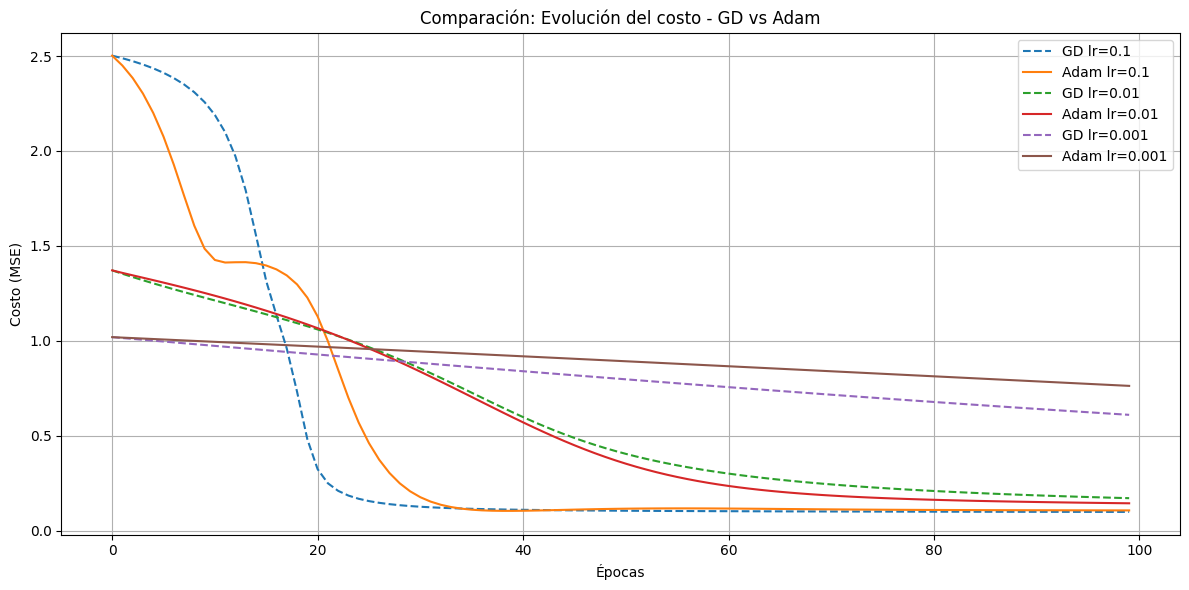

In [187]:
plt.figure(figsize=(12, 6))

for i, lr in enumerate(learning_rates):
    plt.plot(gd_results[i], linestyle='--', label=f'GD lr={lr}')
    plt.plot(adam_results[i], linestyle='-', label=f'Adam lr={lr}')

plt.title("Comparación: Evolución del costo - GD vs Adam")
plt.xlabel("Épocas")
plt.ylabel("Costo (MSE)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


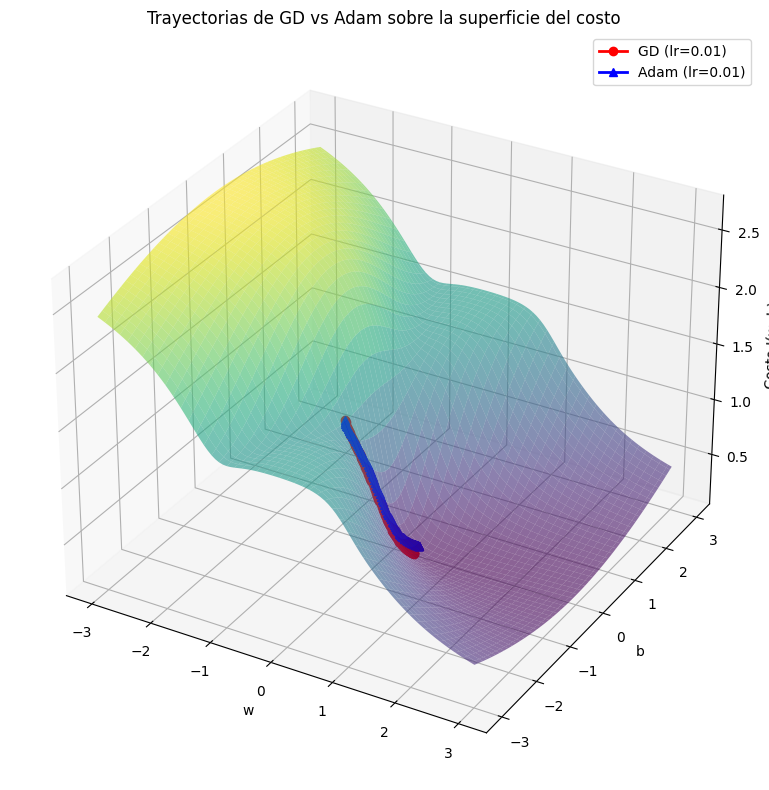

In [189]:
# Usamos learning rate = 0.01
idx = 1
lr = learning_rates[idx]
traj_gd = trajectories[idx]
traj_adam = adam_trajectories[idx]

# Crear grilla para la superficie de costo
w_vals = np.linspace(-3, 3, 100)
b_vals = np.linspace(-3, 3, 100)
W, B = np.meshgrid(w_vals, b_vals)
J = np.zeros_like(W)

# Calcular la función de costo para cada punto de la grilla
for i in range(W.shape[0]):
    for j in range(W.shape[1]):
        y_pred = tanh(W[i, j] * x + B[i, j])
        J[i, j] = mse(y, y_pred)

# Trayectorias
w_gd, b_gd = zip(*traj_gd)
j_gd = [mse(y, tanh(w * x + b)) for w, b in traj_gd]

w_adam, b_adam = zip(*traj_adam)
j_adam = [mse(y, tanh(w * x + b)) for w, b in traj_adam]

# Gráfico 3D
fig = plt.figure(figsize=(14, 8))
ax = fig.add_subplot(111, projection='3d')

# Superficie de costo
ax.plot_surface(W, B, J, cmap='viridis', alpha=0.6, edgecolor='none')

# Trayectoria de GD
ax.plot(w_gd, b_gd, j_gd, color='red', marker='o', label='GD (lr=0.01)', linewidth=2)

# Trayectoria de Adam
ax.plot(w_adam, b_adam, j_adam, color='blue', marker='^', label='Adam (lr=0.01)', linewidth=2)

# Ejes y estética
ax.set_title("Trayectorias de GD vs Adam sobre la superficie del costo")
ax.set_xlabel("w")
ax.set_ylabel("b")
ax.set_zlabel("Costo J(w, b)")
ax.legend()
plt.tight_layout()
plt.show()

# **PREGUNTA 2**

Descargar el dataset del siguiente link: https://drive.google.com/file/d/1hiLnMm7ooBj-wJdz0F4vpvjx9DcEgAkg/view?usp=sharing.

El dataset consiste en compras de productos que diferentes clientes realizaron durante un black sales. El dataset contiene información sobre las transacciones y el objetivo es poder utilizarlo para crear diferentes modelos que puedan predecir cuánto un cliente está dispuesto a gastar en un producto en el futuro.


In [200]:
!pip install -q gdown

In [201]:
import gdown

In [202]:
# ID del archivo
file_id = "1hiLnMm7ooBj-wJdz0F4vpvjx9DcEgAkg"
url = f"https://drive.google.com/uc?id={file_id}"

# Descargar
output = "black_sales_dataset.csv"
gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1hiLnMm7ooBj-wJdz0F4vpvjx9DcEgAkg
To: /Users/ctalamilla/Desktop/Especializacion IA/3erSemestre/aprendizaje_profundo/TPs/tp1/black_sales_dataset.csv
100%|██████████| 25.5M/25.5M [00:02<00:00, 10.7MB/s]


'black_sales_dataset.csv'

### 2a) EDA y preparación del dataset (2 puntos)
Realizar el análisis exploratorio del dataset (EDA) con las herramientas vistas en materias anteriores. Pre-procesar las variables, explicar los criterios utilizados y analizar las distribuciones.

Vamos a tratar este problema como una clasificación donde queremos averiguar si el cliente pertenece a una categoría: "Casual" (gasta menos de 5000), "Gama media" (gasta entre 5000 y 10000), "Fiel" (gasta entre 10000 y 15000) o a "Premium" (gasta más de 15000).

In [203]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [277]:
file = 'black_sales_dataset.csv'
df = pd.read_csv(file)

In [278]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [279]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [280]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [281]:
df.isnull().sum() / len(df) * 100

User_ID                        0.000000
Product_ID                     0.000000
Gender                         0.000000
Age                            0.000000
Occupation                     0.000000
City_Category                  0.000000
Stay_In_Current_City_Years     0.000000
Marital_Status                 0.000000
Product_Category_1             0.000000
Product_Category_2            31.566643
Product_Category_3            69.672659
Purchase                       0.000000
dtype: float64

In [282]:
mean_value = df["Product_Category_2"].mean()
mean_imputation = df["Product_Category_2"].fillna(mean_value)

median_value = df["Product_Category_2"].median()
median_imputation = df["Product_Category_2"].fillna(median_value)

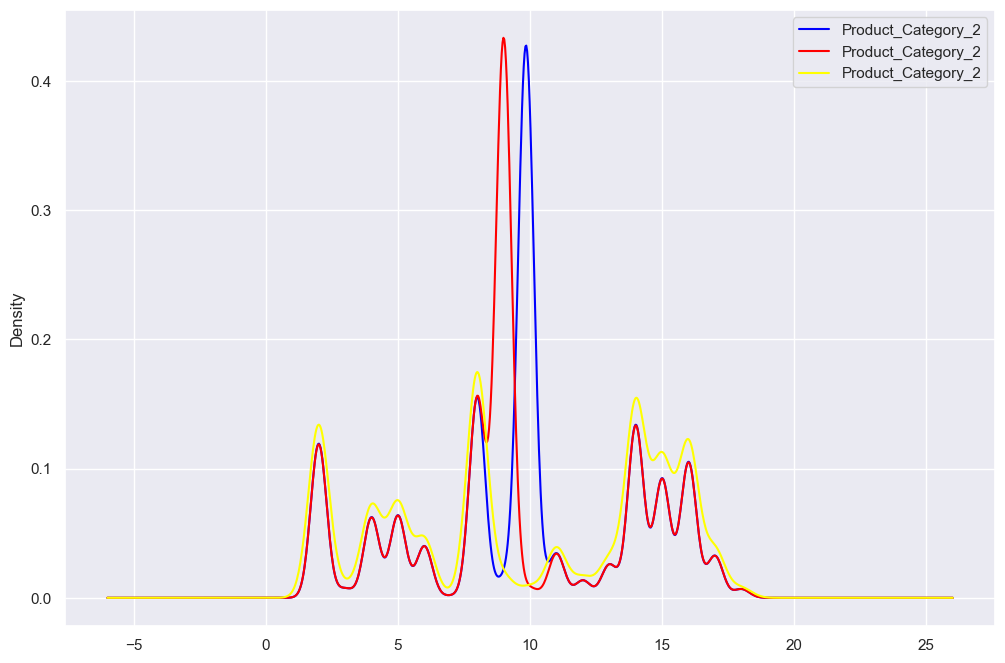

In [283]:
plt.figure(figsize=(12,8))

mean_imputation.plot(kind="kde" , color="blue")
median_imputation.plot(kind="kde" , color ="red")
df["Product_Category_2"].plot(kind="kde" , color ="yellow")
plt.legend()
plt.show()

In [284]:
# Imputar nulos en Product_Category_2 con su media
mean_cat2 = df["Product_Category_2"].mean(skipna=True)
df["Product_Category_2"].fillna(mean_cat2, inplace=True)

In [285]:
# Eliminar columna Product_Category_3
df.drop(columns=["Product_Category_3"], inplace=True)

In [286]:
df.isnull().sum() / len(df) * 100

User_ID                       0.0
Product_ID                    0.0
Gender                        0.0
Age                           0.0
Occupation                    0.0
City_Category                 0.0
Stay_In_Current_City_Years    0.0
Marital_Status                0.0
Product_Category_1            0.0
Product_Category_2            0.0
Purchase                      0.0
dtype: float64

In [287]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,9.842329,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.000000,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,9.842329,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.000000,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,9.842329,7969


In [288]:
# Crear la columna con clasificación según el monto de Purchase
df["Segmento_Cliente"] = df["Purchase"].apply(
    lambda x: (
        "Casual" if x < 5000 else
        "Gama media" if x < 10000 else
        "Fiel" if x < 15000 else
        "Premium"
    )
)

# Verificamos distribución
df["Segmento_Cliente"].value_counts()

Segmento_Cliente
Gama media    265606
Premium       110523
Casual         94923
Fiel           79016
Name: count, dtype: int64

In [289]:
# Eliminar columna Purchase
#df.drop(columns=["Purchase"], inplace=True)

In [290]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase,Segmento_Cliente
0,1000001,P00069042,F,0-17,10,A,2,0,3,9.842329,8370,Gama media
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.000000,15200,Premium
2,1000001,P00087842,F,0-17,10,A,2,0,12,9.842329,1422,Casual
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.000000,1057,Casual
4,1000002,P00285442,M,55+,16,C,4+,0,8,9.842329,7969,Gama media


In [291]:
# Verificamos distribución
df["Age"].value_counts()

Age
26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: count, dtype: int64

## Graficos Univariados

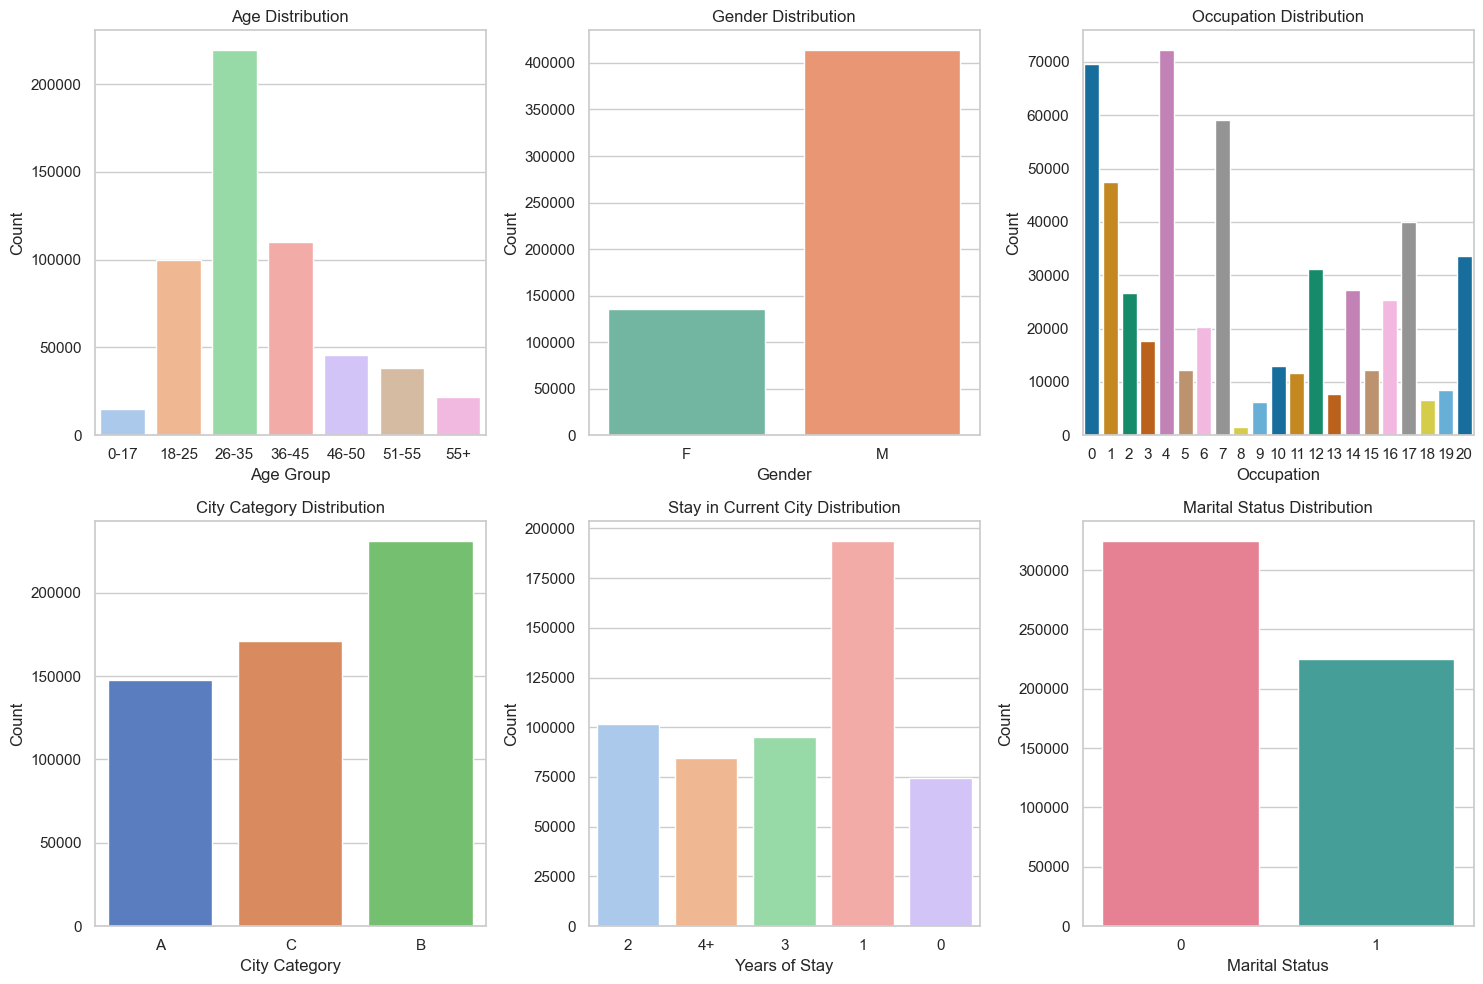

In [292]:
sns.set(style="whitegrid")  

# Set the figure size (15x10 inches)
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Customize and create countplots

# Age Distribution
sns.countplot(x='Age', data=df, palette='pastel', ax=axes[0, 0], 
              order=["0-17", "18-25", "26-35", "36-45", "46-50", "51-55", "55+"])
axes[0, 0].set_title('Age Distribution')
axes[0, 0].set_xlabel('Age Group')
axes[0, 0].set_ylabel('Count')

# Gender Distribution
sns.countplot(x='Gender', data=df, palette='Set2', ax=axes[0, 1])
axes[0, 1].set_title('Gender Distribution')
axes[0, 1].set_xlabel('Gender')
axes[0, 1].set_ylabel('Count')

# Occupation Distribution
sns.countplot(x='Occupation', data=df, palette='colorblind', ax=axes[0, 2])
axes[0, 2].set_title('Occupation Distribution')
axes[0, 2].set_xlabel('Occupation')
axes[0, 2].set_ylabel('Count')

# City Category Distribution
sns.countplot(x='City_Category', data=df, palette='muted', ax=axes[1, 0])
axes[1, 0].set_title('City Category Distribution')
axes[1, 0].set_xlabel('City Category')
axes[1, 0].set_ylabel('Count')

# Stay in Current City Distribution
sns.countplot(x='Stay_In_Current_City_Years', data=df, palette='pastel', ax=axes[1, 1])
axes[1, 1].set_title('Stay in Current City Distribution')
axes[1, 1].set_xlabel('Years of Stay')
axes[1, 1].set_ylabel('Count')

# Marital Status Distribution
sns.countplot(x='Marital_Status', data=df, palette='husl', ax=axes[1, 2])
axes[1, 2].set_title('Marital Status Distribution')
axes[1, 2].set_xlabel('Marital Status')
axes[1, 2].set_ylabel('Count')

# Adjust layout to avoid overlapping and improve spacing
plt.tight_layout()

# Show the plot
plt.show()

Principales resultados:

Distribución por sexos:

El número de hombres compradores supera al de mujeres, lo que indica un posible desequilibrio de género en la participación en el Black Friday.


Grupo de edad:

Los compradores más activos durante el Black Friday se encontraban en el grupo de edad de 26 a 35 años, lo que lo convierte en el grupo demográfico de edad más destacado.


Categoría de ciudad:

La categoría de ciudad B registró el mayor número de compradores, lo que subraya la importancia de esta ubicación en el panorama minorista del Black Friday.


Permanencia:

Las personas con una permanencia de 1 año en su ciudad actual fueron las más comprometidas durante las rebajas del Black Friday.


Estado civil:

Los solteros (estado civil 0) fueron el grupo más numeroso de compradores, lo que sugiere que los solteros son un grupo demográfico importante durante el Black Friday.

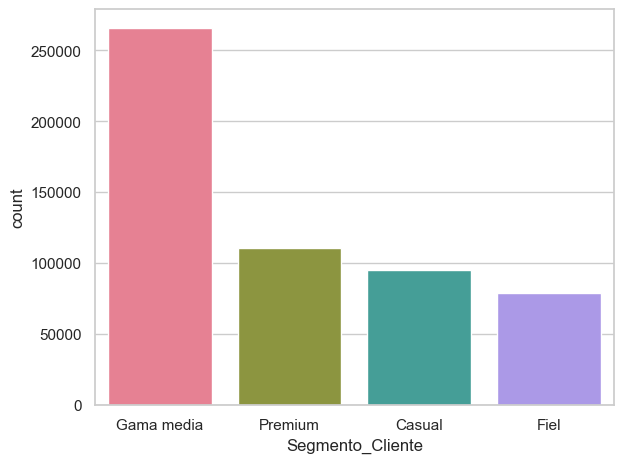

In [293]:
# Marital Status Distribution
sns.countplot(x='Segmento_Cliente', data=df, palette='husl')
axes[1, 2].set_title('Segmento_ClienteDistribution')
axes[1, 2].set_xlabel('Segmento_Cliente')
axes[1, 2].set_ylabel('Count')
# Adjust layout to avoid overlapping and improve spacing
plt.tight_layout()
# Show the plot
plt.show()

## Graficos bivariados

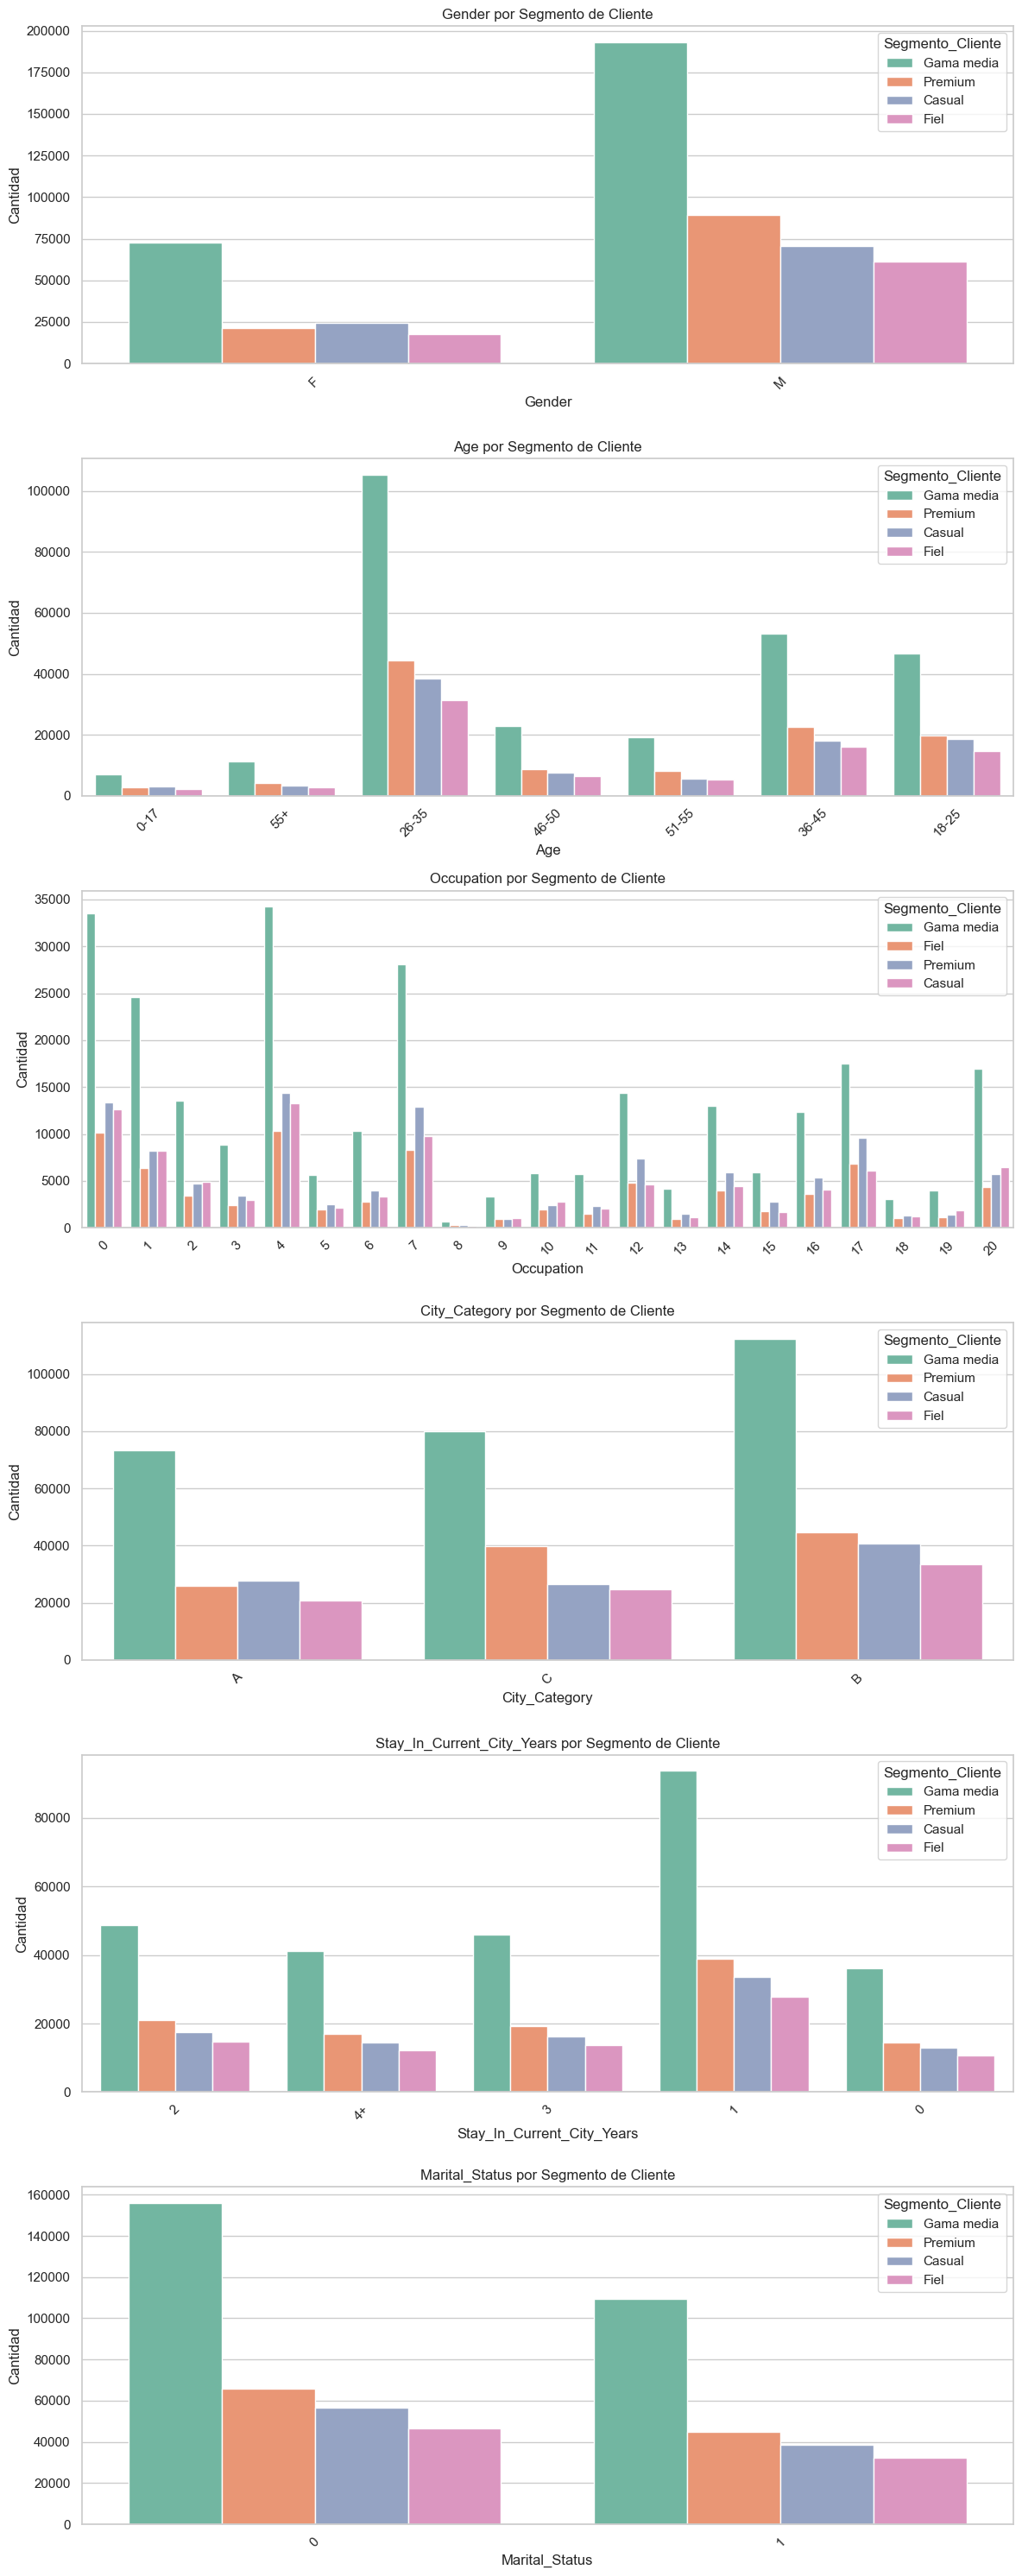

In [294]:
# Estilo visual
sns.set(style="whitegrid")
columns_to_plot = [
    "Gender", "Age", "Occupation",
    "City_Category", "Stay_In_Current_City_Years", "Marital_Status"
]

# Configuramos una figura larga y angosta (1 columna, n filas)
plt.figure(figsize=(12, 30))  # Más alto para que entre todo bien

for i, col in enumerate(columns_to_plot):
    plt.subplot(len(columns_to_plot), 1, i+1)  # n filas, 1 columna
    sns.countplot(data=df, x=col, hue="Segmento_Cliente", palette="Set2")
    plt.title(f"{col} por Segmento de Cliente")
    plt.xticks(rotation=45)
    plt.xlabel(col)
    plt.ylabel("Cantidad")

plt.tight_layout()
plt.show()

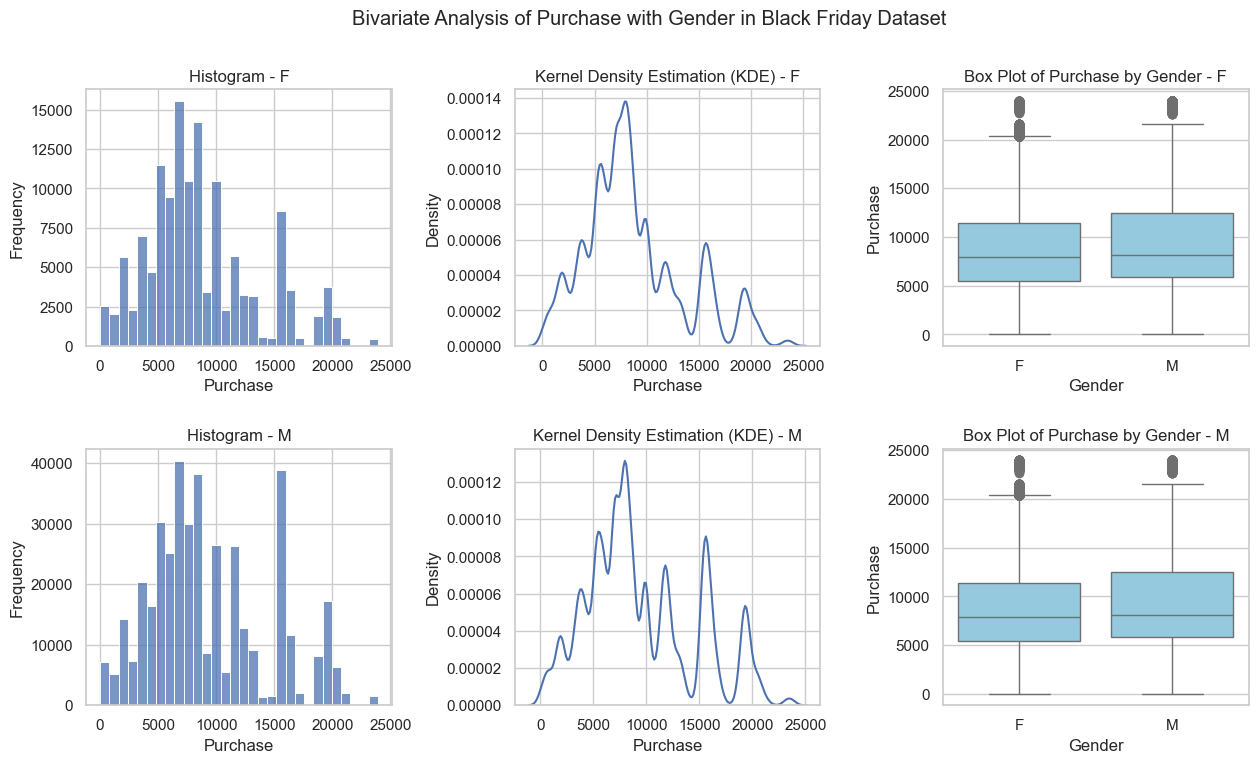

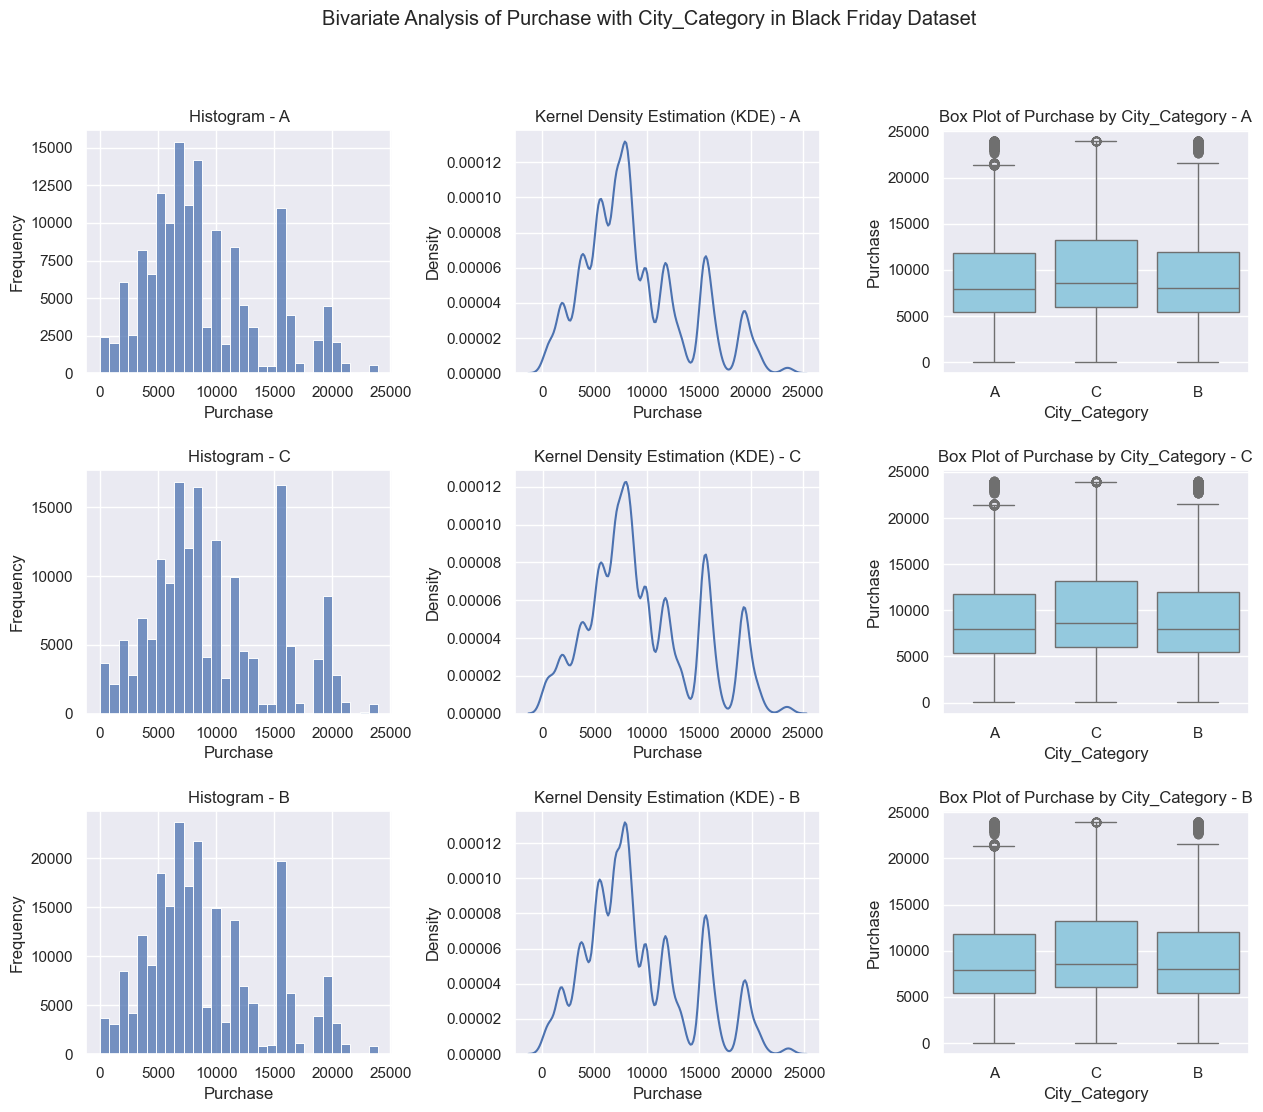

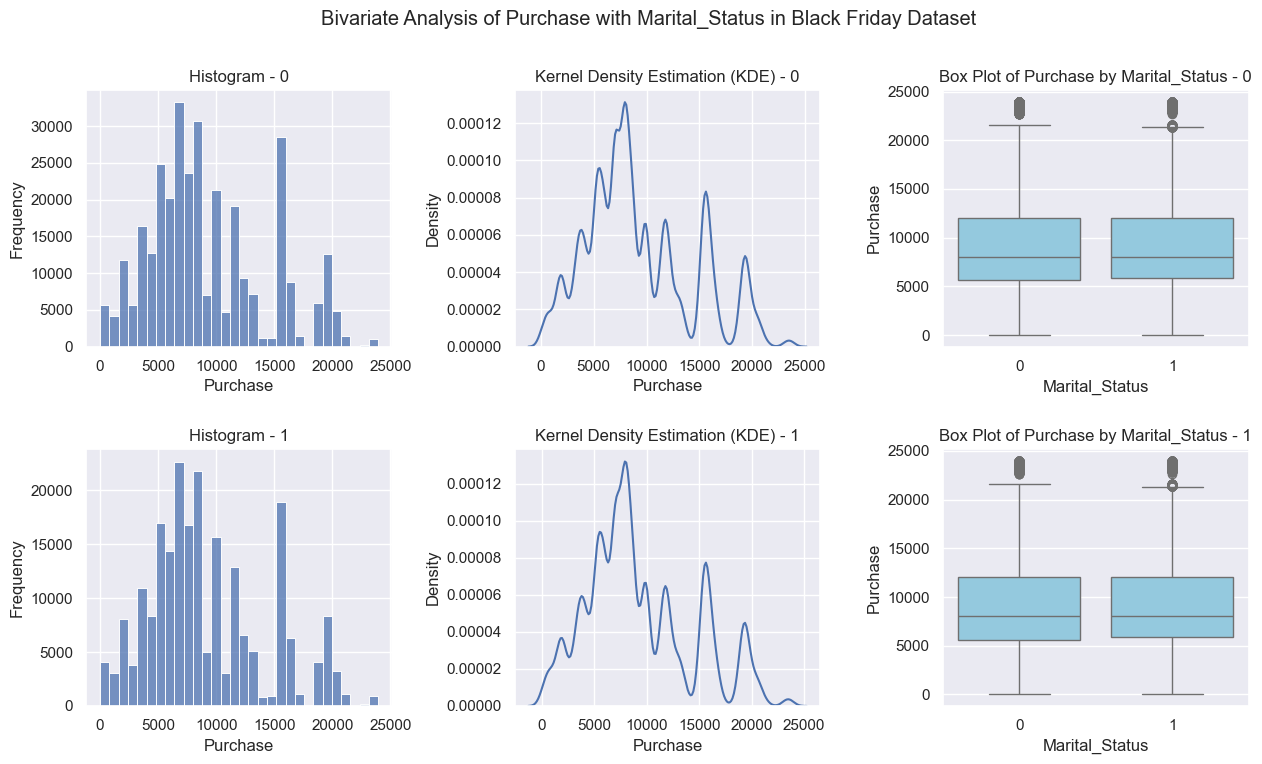

In [295]:
def plot_bivariate_analysis(feature):
    unique_values = df[feature].unique()
    num_values = len(unique_values)

    # Set up subplots
    fig, axes = plt.subplots(num_values, 3, figsize=(15, 4 * num_values))
    fig.suptitle(f'Bivariate Analysis of Purchase with {feature} in Black Friday Dataset')
    plt.subplots_adjust(wspace=0.4, hspace=0.4)
    sns.set_style('darkgrid')

    for idx, value in enumerate(unique_values):
        # Histogram
        sns.histplot(df.loc[df[feature] == value]['Purchase'], kde=False, ax=axes[idx, 0], label=value, bins=30 , palette='viridis' )
        axes[idx, 0].set_title(f'Histogram - {value}')
        axes[idx, 0].set_xlabel('Purchase')
        axes[idx, 0].set_ylabel('Frequency')

        # KDE Plot
        sns.kdeplot(data=df.loc[df[feature] == value]['Purchase'], ax=axes[idx, 1], label=value)
        axes[idx, 1].set_title(f'Kernel Density Estimation (KDE) - {value}')
        axes[idx, 1].set_xlabel('Purchase')
        axes[idx, 1].set_ylabel('Density')

        # Box Plot
        sns.boxplot(x=df[feature], y=df['Purchase'], ax=axes[idx, 2], color='skyblue')
        axes[idx, 2].set_title(f'Box Plot of Purchase by {feature} - {value}')
        axes[idx, 2].set_xlabel(f'{feature}')
        axes[idx, 2].set_ylabel('Purchase')

    plt.show()

# Example Usage:
plot_bivariate_analysis('Gender')
plot_bivariate_analysis('City_Category')
plot_bivariate_analysis('Marital_Status')

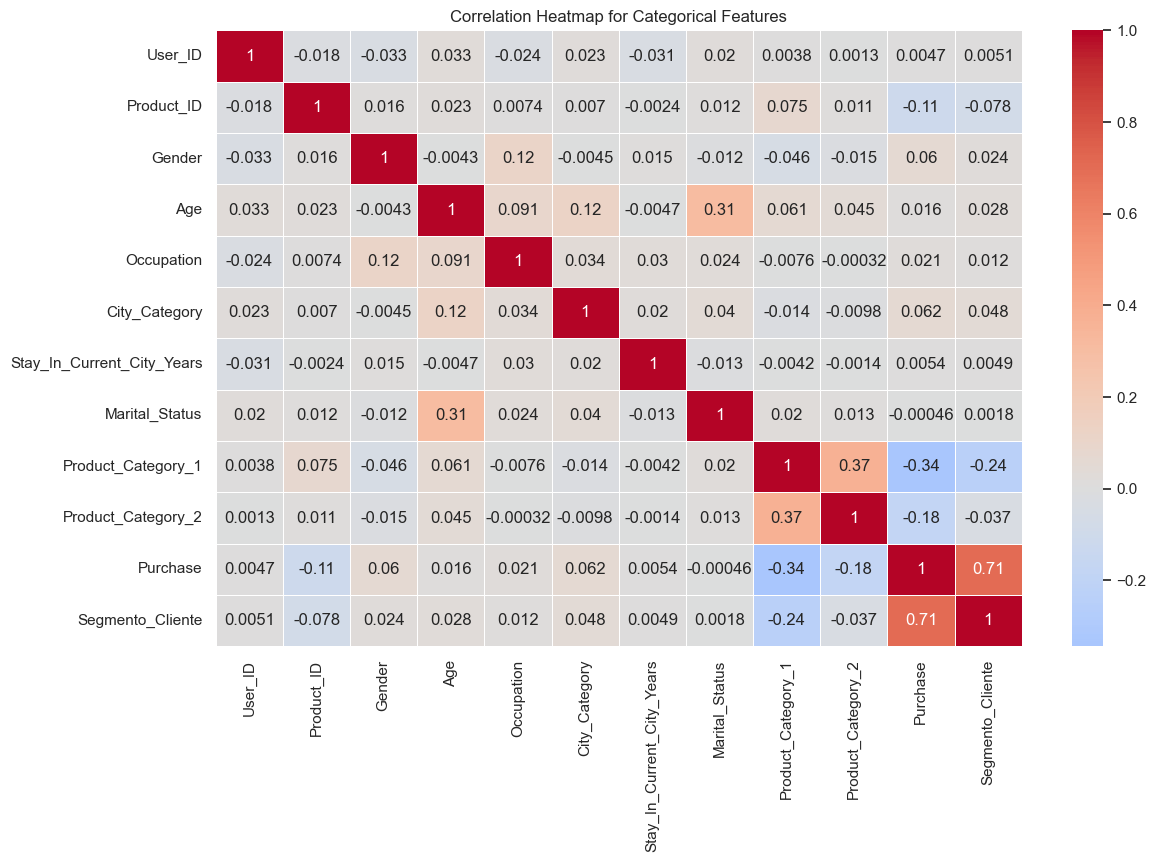

In [296]:
# Convert categorical columns to numerical codes
df_copy = df.copy()

columns_to_convert = ['Product_ID', 'Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years', 'Segmento_Cliente']
for col in columns_to_convert:
    df_copy[col] = df_copy[col].astype('category').cat.codes

# Calculate correlation matrix
correlation_matrix = df_copy.corr(method='pearson')

# Plot heatmap
plt.figure(figsize=(13, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5, center=0)
plt.title('Correlation Heatmap for Categorical Features')
plt.show()

### 2b) Benchmark de modelos de ML clásico  (1 punto)
Definir uno o varios puntos de comparación (benchmark) para comparar entre sí al menos 2 modelos distintos. Estos deben ser modelos de ML clásico de la librería `sklearn` de fácil y rápido entrenamiento.

In [297]:
from sklearn.preprocessing import LabelEncoder

In [298]:
df.head(3)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase,Segmento_Cliente
0,1000001,P00069042,F,0-17,10,A,2,0,3,9.842329,8370,Gama media
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.000000,15200,Premium
2,1000001,P00087842,F,0-17,10,A,2,0,12,9.842329,1422,Casual


In [299]:
# Copia y creación del target de clasificación ---
df_clean = df.copy()
# Eliminar solo columnas irrelevantes ---
df_clean.drop(['User_ID', 'Product_ID', 'Purchase'], axis=1, inplace=True)


In [300]:
# Codificar variables categóricas
df_clean['Gender'] = LabelEncoder().fit_transform(df_clean['Gender'])
df_clean['City_Category'] = LabelEncoder().fit_transform(df_clean['City_Category'])

In [301]:
# Codificar target
label_encoder_segmento = LabelEncoder()
df_clean['Segmento_Cliente'] = label_encoder_segmento.fit_transform(df_clean['Segmento_Cliente'])

In [302]:
df_clean.head(3)

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Segmento_Cliente
0,0,0-17,10,0,2,0,3,9.842329,2
1,0,0-17,10,0,2,0,1,6.000000,3
2,0,0-17,10,0,2,0,12,9.842329,0


In [307]:
df_clean['Age'].value_counts()

Age
26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: count, dtype: int64

In [308]:
# Diccionario de mapeo ordenado
age_mapping = {
    '0-17': 0,
    '18-25': 1,
    '26-35': 2,
    '36-45': 3,
    '46-50': 4,
    '51-55': 5,
    '55+': 6
}

# Aplicar codificación
df_clean['Age'] = df_clean['Age'].map(age_mapping)

In [310]:
df_clean['Age'].value_counts().sort_index()

Age
0     15102
1     99660
2    219587
3    110013
4     45701
5     38501
6     21504
Name: count, dtype: int64

In [305]:
df_clean['Stay_In_Current_City_Years'] = df_clean['Stay_In_Current_City_Years'].replace('4+', 4).astype(int)

In [311]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      550068 non-null  int64  
 1   Age                         550068 non-null  int64  
 2   Occupation                  550068 non-null  int64  
 3   City_Category               550068 non-null  int64  
 4   Stay_In_Current_City_Years  550068 non-null  int64  
 5   Marital_Status              550068 non-null  int64  
 6   Product_Category_1          550068 non-null  int64  
 7   Product_Category_2          550068 non-null  float64
 8   Segmento_Cliente            550068 non-null  int64  
dtypes: float64(1), int64(8)
memory usage: 37.8 MB


In [312]:
X = df_clean.drop(columns=["Segmento_Cliente"], axis=1)
y = df_clean["Segmento_Cliente"]

In [315]:
X.shape, y.shape

((550068, 8), (550068,))

In [318]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

In [319]:
# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123, stratify=y)

In [320]:
import xgboost as xgb

In [321]:
model = xgb.XGBClassifier(n_estimators=800, use_label_encoder=False, eval_metric='mlogloss')
model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=800,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

In [322]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

In [323]:
print("Accuracy Train:", accuracy_score(y_train, y_pred_train))
print("Accuracy Test:", accuracy_score(y_test, y_pred_test))
print("\nClassification Report:\n", classification_report(y_test, y_pred_test, target_names=label_encoder_segmento.classes_))

Accuracy Train: 0.737237272332988
Accuracy Test: 0.715308960677732

Classification Report:
               precision    recall  f1-score   support

      Casual       0.84      0.44      0.58     28477
        Fiel       0.50      0.31      0.38     23705
  Gama media       0.81      0.86      0.83     79682
     Premium       0.59      0.90      0.71     33157

    accuracy                           0.72    165021
   macro avg       0.68      0.63      0.63    165021
weighted avg       0.72      0.72      0.70    165021



In [324]:
from sklearn.ensemble import RandomForestClassifier

In [325]:
# Modelo
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [326]:
y_pred = rf_model.predict(X_test)

In [328]:
print("Accuracy Train:", accuracy_score(y_train, y_pred_train))
print("Accuracy Test:", accuracy_score(y_test, y_pred_test))
print("\nReporte de clasificación:\n")
print(classification_report(y_test, y_pred))

Accuracy Train: 0.737237272332988
Accuracy Test: 0.715308960677732

Reporte de clasificación:

              precision    recall  f1-score   support

           0       0.74      0.45      0.56     28477
           1       0.44      0.33      0.38     23705
           2       0.79      0.85      0.82     79682
           3       0.60      0.80      0.68     33157

    accuracy                           0.70    165021
   macro avg       0.64      0.61      0.61    165021
weighted avg       0.69      0.70      0.68    165021



### 2c) Modelo de deep leaning sin embeddings (1.5 puntos)
Entrenar un modelo de deep learning usando Pytorch que no utilice embeddings, **descartando el `product_id` y `user_id`**. Graficar las evoluciones de la función de costo y la metrica de validacion. Explicar el proceso de iteracion utilizado para conseguir los resultados y justificar los resultados obtenidos.

In [336]:
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

In [337]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [338]:
# Convertir a tensores
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.long)

X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.long)

In [339]:
# Crear datasets
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

In [340]:
# DataLoaders
batch_size = 128
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

In [341]:
class DeepClassifier(nn.Module):
    def __init__(self, input_dim, hidden_dim=64, num_classes=4):
        super(DeepClassifier, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(),
            nn.Dropout(0.3),# regularization
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, num_classes)
        )

    def forward(self, x):
        return self.net(x)

In [342]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [343]:
model = DeepClassifier(input_dim=X_train.shape[1]).to(device)

In [344]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [345]:
# Para graficar
train_losses, test_accuracies = [], []

num_epochs = 20

for epoch in range(num_epochs):
    model.train()
    epoch_loss = 0
    for xb, yb in train_loader:
        xb, yb = xb.to(device), yb.to(device)

        optimizer.zero_grad()
        outputs = model(xb)
        loss = criterion(outputs, yb)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()

    train_losses.append(epoch_loss / len(train_loader))

    # Validación
    model.eval()
    correct = total = 0
    with torch.no_grad():
        for xb, yb in test_loader:
            xb, yb = xb.to(device), yb.to(device)
            outputs = model(xb)
            _, predicted = torch.max(outputs, 1)
            correct += (predicted == yb).sum().item()
            total += yb.size(0)

    accuracy = correct / total
    test_accuracies.append(accuracy)

    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {train_losses[-1]:.4f}, Val Acc: {accuracy:.4f}")

Epoch 1/20, Loss: 0.9896, Val Acc: 0.6562
Epoch 2/20, Loss: 0.8445, Val Acc: 0.6883
Epoch 3/20, Loss: 0.7984, Val Acc: 0.6910
Epoch 4/20, Loss: 0.7821, Val Acc: 0.7044
Epoch 5/20, Loss: 0.7677, Val Acc: 0.7045
Epoch 6/20, Loss: 0.7619, Val Acc: 0.7059
Epoch 7/20, Loss: 0.7588, Val Acc: 0.7089
Epoch 8/20, Loss: 0.7556, Val Acc: 0.7099
Epoch 9/20, Loss: 0.7532, Val Acc: 0.7066
Epoch 10/20, Loss: 0.7515, Val Acc: 0.7009
Epoch 11/20, Loss: 0.7494, Val Acc: 0.7095
Epoch 12/20, Loss: 0.7476, Val Acc: 0.7052
Epoch 13/20, Loss: 0.7459, Val Acc: 0.7013
Epoch 14/20, Loss: 0.7446, Val Acc: 0.7016
Epoch 15/20, Loss: 0.7439, Val Acc: 0.7059
Epoch 16/20, Loss: 0.7427, Val Acc: 0.7011
Epoch 17/20, Loss: 0.7418, Val Acc: 0.7015
Epoch 18/20, Loss: 0.7411, Val Acc: 0.7019
Epoch 19/20, Loss: 0.7409, Val Acc: 0.7018
Epoch 20/20, Loss: 0.7400, Val Acc: 0.7014


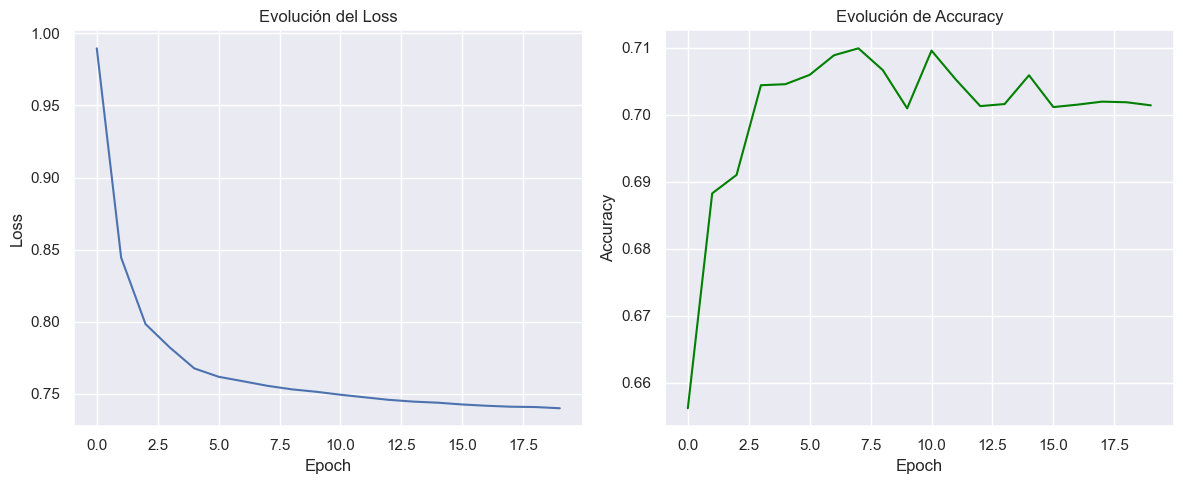

In [346]:
plt.figure(figsize=(12, 5))

# Loss
plt.subplot(1, 2, 1)
plt.plot(train_losses, label="Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Evolución del Loss")
plt.grid(True)

# Accuracy
plt.subplot(1, 2, 2)
plt.plot(test_accuracies, label="Validation Accuracy", color='green')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Evolución de Accuracy")
plt.grid(True)

plt.tight_layout()
plt.show()


### 2d) Modelo de deep leaning con embeddings (2 puntos)
Entrenar un modelo de deep learning usando Pytorch que utilice **2 capas de embeddings**, una para los productos y otra para los usuarios. Graficar las evoluciones de la función de costo y la métrica de validación. Explicar el proceso de iteración utilizado para conseguir los resultados y justificar los resultados obtenidos. **Comparar contra el modelo sin embeddings**.
Recordar que tanto para el punto 2c) como el 2d) pueden usarse herramientas como regularización y prueba de hiperpametros para conseguir mejores resultados.

In [349]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase,Segmento_Cliente
0,1000001,P00069042,F,0-17,10,A,2,0,3,9.842329,8370,Gama media
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.000000,15200,Premium
2,1000001,P00087842,F,0-17,10,A,2,0,12,9.842329,1422,Casual
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.000000,1057,Casual
4,1000002,P00285442,M,55+,16,C,4+,0,8,9.842329,7969,Gama media


In [350]:
df_clean.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Segmento_Cliente
0,0,0,10,0,2,0,3,9.842329,2
1,0,0,10,0,2,0,1,6.000000,3
2,0,0,10,0,2,0,12,9.842329,0
3,0,0,10,0,2,0,12,14.000000,0
4,1,6,16,2,4,0,8,9.842329,2


In [351]:
# Asegurar que los índices coinciden
assert df_clean.shape[0] == df.shape[0], "Los dataframes deben tener igual cantidad de filas"

In [352]:
# Recuperar User_ID y Product_ID
df_clean["User_ID"] = df["User_ID"].values
df_clean["Product_ID"] = df["Product_ID"].values

In [353]:
# Mapear User_ID a índice
user_id_to_idx = {uid: idx for idx, uid in enumerate(df_clean["User_ID"].unique())}
product_id_to_idx = {pid: idx for idx, pid in enumerate(df_clean["Product_ID"].unique())}

In [360]:
df_clean.shape

(550068, 11)

In [359]:
len(user_id_to_idx) , len(product_id_to_idx)

(5891, 3631)

In [361]:
# Crear vectores de índices
user_idx = df_clean["User_ID"].map(user_id_to_idx).values
product_idx = df_clean["Product_ID"].map(product_id_to_idx).values

In [363]:
user_idx , product_idx

(array([   0,    0,    0, ..., 5328, 5878, 5330]),
 array([   0,    1,    2, ..., 3626, 3626, 3629]))

In [364]:
len(user_idx) , len(product_idx)

(550068, 550068)

In [365]:
df_clean.head(3)

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Segmento_Cliente,User_ID,Product_ID
0,0,0,10,0,2,0,3,9.842329,2,1000001,P00069042
1,0,0,10,0,2,0,1,6.000000,3,1000001,P00248942
2,0,0,10,0,2,0,12,9.842329,0,1000001,P00087842


In [366]:
# Excluir columnas irrelevantes
X_numeric = df_clean.drop(columns=["Segmento_Cliente", "User_ID", "Product_ID"]).values
y = df_clean["Segmento_Cliente"].values

In [367]:
# Split del dataset (separado pero coherente para todos los arrays)
X_train, X_test, y_train, y_test, user_idx_train, user_idx_test, product_idx_train, product_idx_test = train_test_split(
    X_numeric, y, user_idx, product_idx, test_size=0.2, random_state=42)

In [368]:
class BlackSalesWithEmbeddingsDataset(torch.utils.data.Dataset):
    def __init__(self, X, user_idx, product_idx, y):
        self.X = X
        self.user_idx = user_idx
        self.product_idx = product_idx
        self.y = y

    def __len__(self):
        return len(self.y)

    def __getitem__(self, idx):
        return (
            torch.tensor(self.X[idx], dtype=torch.float32),
            torch.tensor(self.user_idx[idx], dtype=torch.long),
            torch.tensor(self.product_idx[idx], dtype=torch.long),
            torch.tensor(self.y[idx], dtype=torch.long)
        )

In [369]:
# Crear DataLoaders
batch_size = 128

train_dataset = BlackSalesWithEmbeddingsDataset(X_train, user_idx_train, product_idx_train, y_train)
test_dataset = BlackSalesWithEmbeddingsDataset(X_test, user_idx_test, product_idx_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

In [370]:
class NetWithEmbeddings(nn.Module):
    def __init__(self, n_numeric, n_users, n_products, emb_dim=8, hidden=128, num_classes=4):
        super(NetWithEmbeddings, self).__init__()
        self.user_emb = nn.Embedding(n_users, emb_dim)
        self.product_emb = nn.Embedding(n_products, emb_dim)
        self.net = nn.Sequential(
            nn.Linear(n_numeric + 2 * emb_dim, hidden),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(hidden, hidden),
            nn.ReLU(),
            nn.Linear(hidden, num_classes)
        )

    def forward(self, x_numeric, user_idx, product_idx):
        user_e = self.user_emb(user_idx)
        prod_e = self.product_emb(product_idx)
        x = torch.cat([x_numeric, user_e, prod_e], dim=1)
        return self.net(x)


In [371]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = NetWithEmbeddings(
    n_numeric=X_train.shape[1],
    n_users=len(user_id_to_idx),
    n_products=len(product_id_to_idx)
).to(device)


In [372]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-5)

In [373]:
# Entrenamiento
train_loss_hist, test_acc_hist = [], []
num_epochs = 20

for epoch in range(num_epochs):
    model.train()
    total_loss = 0
    for xb, ub, pb, yb in train_loader:
        xb, ub, pb, yb = xb.to(device), ub.to(device), pb.to(device), yb.to(device)

        optimizer.zero_grad()
        out = model(xb, ub, pb)
        loss = criterion(out, yb)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    train_loss_hist.append(total_loss / len(train_loader))

    # Validación
    model.eval()
    correct = total = 0
    with torch.no_grad():
        for xb, ub, pb, yb in test_loader:
            xb, ub, pb, yb = xb.to(device), ub.to(device), pb.to(device), yb.to(device)
            preds = model(xb, ub, pb).argmax(dim=1)
            correct += (preds == yb).sum().item()
            total += yb.size(0)
    acc = correct / total
    test_acc_hist.append(acc)

    print(f"Epoch {epoch+1} - Loss: {train_loss_hist[-1]:.4f} - Val Acc: {acc:.4f}")

Epoch 1 - Loss: 0.8543 - Val Acc: 0.7175
Epoch 2 - Loss: 0.6693 - Val Acc: 0.7355
Epoch 3 - Loss: 0.6288 - Val Acc: 0.7436
Epoch 4 - Loss: 0.6141 - Val Acc: 0.7446
Epoch 5 - Loss: 0.6067 - Val Acc: 0.7485
Epoch 6 - Loss: 0.6009 - Val Acc: 0.7478
Epoch 7 - Loss: 0.5965 - Val Acc: 0.7496
Epoch 8 - Loss: 0.5933 - Val Acc: 0.7504
Epoch 9 - Loss: 0.5912 - Val Acc: 0.7500
Epoch 10 - Loss: 0.5881 - Val Acc: 0.7507
Epoch 11 - Loss: 0.5852 - Val Acc: 0.7511
Epoch 12 - Loss: 0.5827 - Val Acc: 0.7521
Epoch 13 - Loss: 0.5804 - Val Acc: 0.7518
Epoch 14 - Loss: 0.5780 - Val Acc: 0.7523
Epoch 15 - Loss: 0.5747 - Val Acc: 0.7526
Epoch 16 - Loss: 0.5729 - Val Acc: 0.7513
Epoch 17 - Loss: 0.5709 - Val Acc: 0.7525
Epoch 18 - Loss: 0.5688 - Val Acc: 0.7527
Epoch 19 - Loss: 0.5666 - Val Acc: 0.7514
Epoch 20 - Loss: 0.5644 - Val Acc: 0.7528


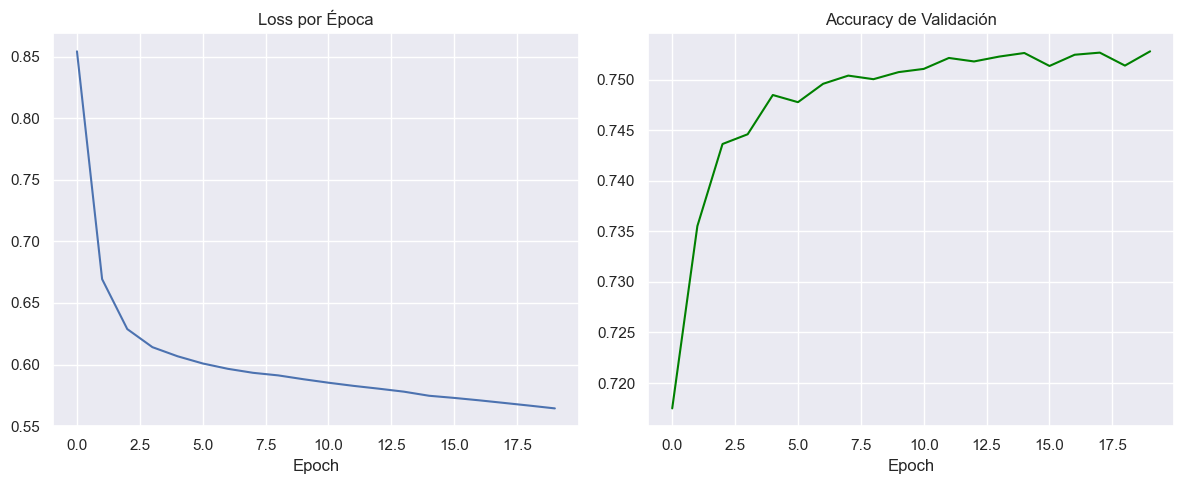

In [377]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(train_loss_hist, label='Train Loss')
plt.title("Loss por Época")
plt.xlabel("Epoch")
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(test_acc_hist, label='Validation Accuracy', color='green')
plt.title("Accuracy de Validación")
plt.xlabel("Epoch")
plt.grid(True)

plt.tight_layout()
plt.show()

### 2e) Encontrar usuarios similares (0.5 puntos)
Para el modelo del punto 2c) implementar una función que a reciba un id de usuario y sugiera **n** cantidad de usuarios que tuvieron un comportamiento de compras similar.

In [378]:
# Obtenemos todos los embeddings como tensor (sin gradiente)
user_embeddings_tensor = model.user_emb.weight.data.cpu()

In [379]:
# Lo pasamos a numpy
user_embeddings = user_embeddings_tensor.numpy()

In [380]:
user_embeddings

array([[-0.12056547, -0.17106062,  0.25533047, ...,  0.2639656 ,
         0.2280534 , -0.24448484],
       [-0.11137661, -0.10295121,  0.07362414, ..., -0.09601715,
         0.2446794 , -0.05856925],
       [-0.11904357,  0.1426902 ,  0.14110568, ...,  0.36252487,
        -0.24208437, -0.22081429],
       ...,
       [-0.1011374 ,  0.1859718 ,  0.08871506, ...,  0.06561316,
        -0.18117857, -0.14984633],
       [ 0.05615744,  0.03243278,  0.03351643, ...,  0.12582226,
        -0.00158652, -0.02382691],
       [-0.09538193,  0.00896784, -0.02636777, ...,  0.07756779,
         0.2773347 , -0.04469707]], dtype=float32)

In [381]:
# Mapas inversos para recuperar el User_ID real
idx_to_user_id = {v: k for k, v in user_id_to_idx.items()}
user_ids_ordered = [idx_to_user_id[i] for i in range(len(idx_to_user_id))]


In [382]:
from sklearn.metrics.pairwise import cosine_similarity

In [383]:
def sugerir_usuarios_similares_por_embedding(user_id_consulta, n=5):
    if user_id_consulta not in user_id_to_idx:
        print("Usuario no encontrado en embeddings.")
        return []

    idx_consulta = user_id_to_idx[user_id_consulta]
    emb_consulta = user_embeddings[idx_consulta].reshape(1, -1)

    # Calcular similitud coseno con todos los embeddings
    similitudes = cosine_similarity(emb_consulta, user_embeddings)[0]

    # Ordenar por similitud (excluir a sí mismo)
    indices_ordenados = np.argsort(similitudes)[::-1]
    similares_idx = [i for i in indices_ordenados if i != idx_consulta][:n]

    # Mapear a User_ID reales
    usuarios_similares = [idx_to_user_id[i] for i in similares_idx]
    return usuarios_similares

In [387]:
sugerir_usuarios_similares_por_embedding(user_id_consulta=1000002, n=8)


[1005816, 1004458, 1003581, 1000062, 1005288, 1000915, 1002154, 1003143]